In [ ]:
import pandas as pd
import numpy as np

# Generate the data
dates = pd.date_range(start='2016-01', end='2022-12', freq='M')
patient_admissions = np.random.randint(150, 200, len(dates))

df = pd.DataFrame({'Date': dates, 'Patient Admissions': patient_admissions})
df['Date'] = df['Date'].dt.strftime('%b-%Y')  # Convert date format to match the example

# Save the generated dataset as CSV
df.to_csv('health_sector_dataset.csv', index=False)


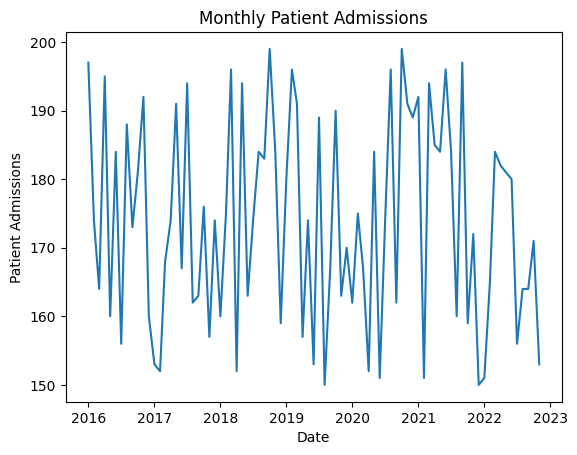

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
#df = pd.read_csv('health_sector_dataset.csv')
#df['Date'] = pd.to_datetime(df['Date'])
#df.set_index('Date', inplace=True)

# Visualize the data
plt.plot(df.index, df['Patient Admissions'])
plt.xlabel('Date')
plt.ylabel('Patient Admissions')
plt.title('Monthly Patient Admissions')
plt.show()


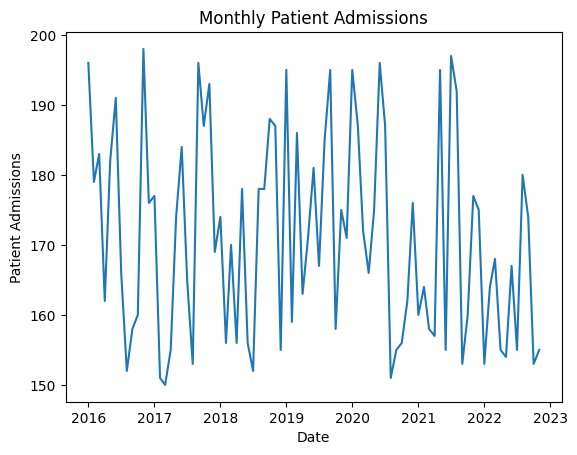

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Us

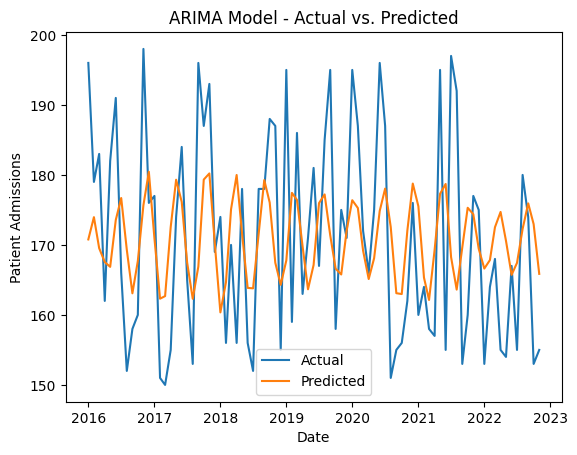

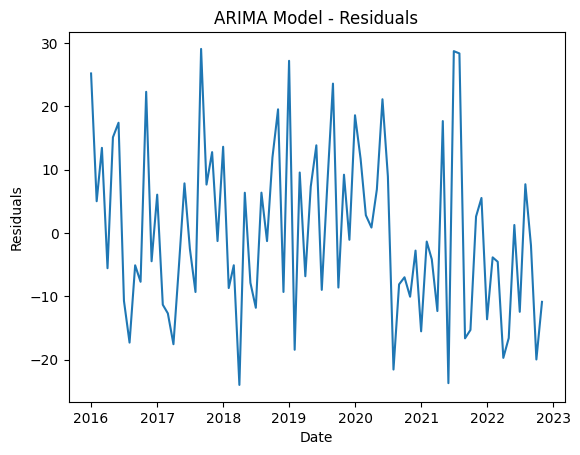

Mean Squared Error (MSE): 183.5636022469545
Root Mean Squared Error (RMSE): 13.548564582528826
Mean Absolute Error (MAE): 11.398867587120648
Forecasted Patient Admissions:
2022-12-01    164.293407
2023-01-01    170.834936
2023-02-01    177.220350
2023-03-01    175.600644
2023-04-01    168.082804
2023-05-01    163.995541
2023-06-01    168.314916
2023-07-01    175.608745
2023-08-01    176.865919
2023-09-01    170.627732
2023-10-01    164.672521
2023-11-01    166.318501
Freq: MS, Name: predicted_mean, dtype: float64
Confidence Intervals:
            lower Patient Admissions  upper Patient Admissions
2022-12-01                138.144476                190.442339
2023-01-01                144.611366                197.058506
2023-02-01                150.971731                203.468968
2023-03-01                149.335412                201.865876
2023-04-01                141.743103                194.422504
2023-05-01                137.655985                190.335097
2023-06-01        

InvalidIndexError: ignored

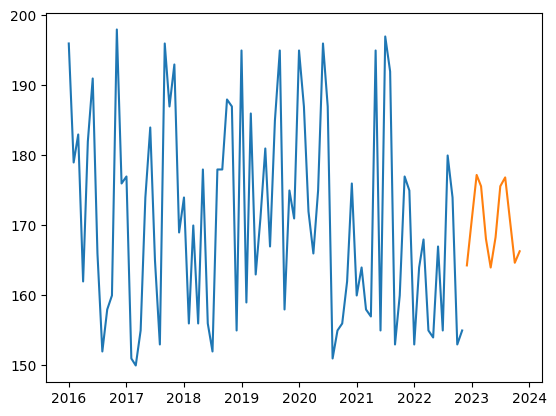

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Step 1: Load the Data
df = pd.read_csv('health_sector_dataset.csv', parse_dates=['Date'])
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Step 2: Visualize the Data
plt.plot(df.index, df['Patient Admissions'])
plt.xlabel('Date')
plt.ylabel('Patient Admissions')
plt.title('Monthly Patient Admissions')
plt.show()

# Step 3: Stationarize the Data (if needed)
# If the data is not stationary, apply transformations like differencing

# Step 4: Determine ARIMA Parameters
# Determine the order of differencing (d), autoregressive order (p), and moving average order (q) using ACF and PACF plots

# Step 5: Build and Train the ARIMA Model
model = ARIMA(df['Patient Admissions'].astype(float), order=(p, d, q))
model_fit = model.fit()

# Step 6: Validate the Model
# Get the predicted values and residuals
predictions = model_fit.predict()
residuals = df['Patient Admissions'] - predictions

# Plot the predicted values and residuals
plt.plot(df.index, df['Patient Admissions'], label='Actual')
plt.plot(df.index, predictions, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Patient Admissions')
plt.title('ARIMA Model - Actual vs. Predicted')
plt.legend()
plt.show()

plt.plot(df.index, residuals)
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.title('ARIMA Model - Residuals')
plt.show()

# Calculate and print accuracy metrics
mse = mean_squared_error(df['Patient Admissions'], predictions)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(residuals))
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)

# Step 7: Make Forecasts
forecast_periods = 12  # Number of periods to forecast
forecast = model_fit.get_forecast(steps=forecast_periods)
forecast_mean = forecast.predicted_mean
confidence_interval = forecast.conf_int()

# Print the forecasted values and confidence intervals
print("Forecasted Patient Admissions:")
print(forecast_mean)
print("Confidence Intervals:")
print(confidence_interval)

# Visualize the forecasted values and confidence intervals
plt.plot(df.index, df['Patient Admissions'], label='Actual')
plt.plot(forecast_mean.index, forecast_mean, label='Forecast')
plt.fill_between(forecast_mean.index, confidence_interval[:, 0], confidence_interval[:, 1], alpha=0.2)
plt.xlabel('Date')
plt.ylabel('Patient Admissions')
plt.title('ARIMA Model - Forecasted Patient Admissions')
plt.legend()
plt.show()


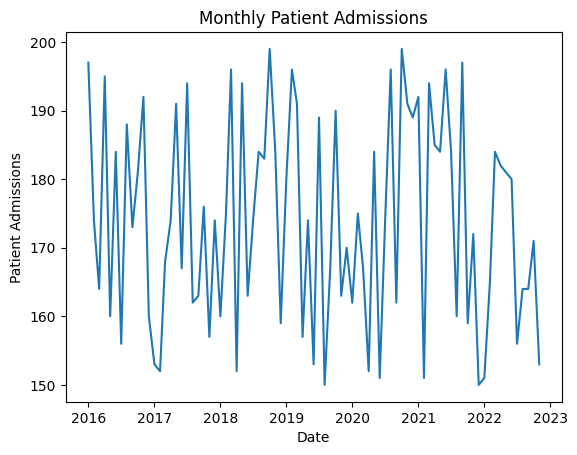

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


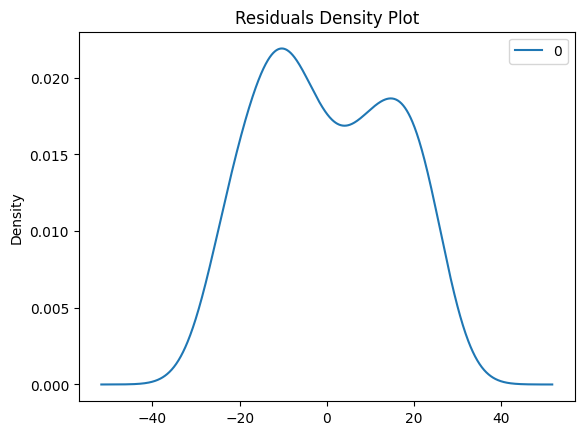

Forecasted Patient Admissions:
2022-12-01    176.312012
2023-01-01    172.889459
2023-02-01    174.354164
2023-03-01    173.727334
2023-04-01    173.995590
2023-05-01    173.880788
2023-06-01    173.929918
2023-07-01    173.908892
2023-08-01    173.917890
2023-09-01    173.914040
2023-10-01    173.915688
2023-11-01    173.914982
Freq: MS, Name: predicted_mean, dtype: float64
Confidence Intervals:
            lower Patient Admissions  upper Patient Admissions
2022-12-01                147.036646                205.587378
2023-01-01                143.421388                202.357530
2023-02-01                144.850936                203.857392
2023-03-01                144.217671                203.236996
2023-04-01                144.484749                203.506430
2023-05-01                144.369731                203.391844
2023-06-01                144.418822                203.441014
2023-07-01                144.397789                203.419995
2023-08-01                144.406

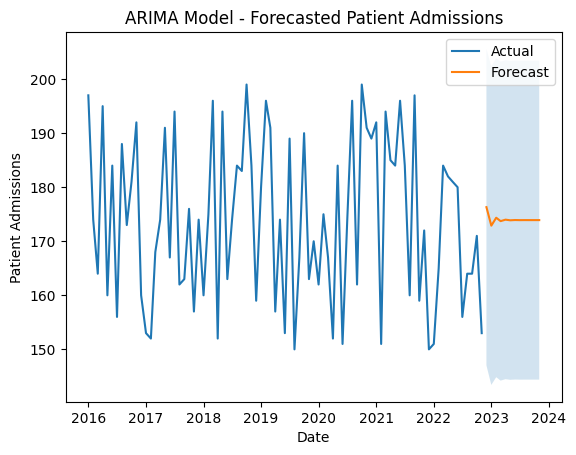

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Step 1: Load the Data
df = pd.read_csv('health_sector_dataset.csv', parse_dates=['Date'])
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Step 2: Visualize the Data
plt.plot(df.index, df['Patient Admissions'])
plt.xlabel('Date')
plt.ylabel('Patient Admissions')
plt.title('Monthly Patient Admissions')
plt.show()

# Step 3: Stationarize the Data (if needed)
# If the data is not stationary, apply transformations like differencing

# Step 4: Determine ARIMA Parameters
p = 1  # Autoregressive order
d = 0  # Order of differencing
q = 1  # Moving average order

# Step 5: Build the ARIMA Model
model = ARIMA(df['Patient Admissions'].astype(float), order=(p, d, q))
model_fit = model.fit()

# Step 6: Validate the Model
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(kind='kde')
plt.title('Residuals Density Plot')
plt.show()

# Calculate MSE, RMSE, MAE, etc. to evaluate model performance

# Step 7: Make Forecasts
forecast_periods = 12  # Number of periods to forecast
forecast = model_fit.get_forecast(steps=forecast_periods)
forecast_mean = forecast.predicted_mean
confidence_interval = forecast.conf_int()

# Print the forecasted values and confidence intervals
print("Forecasted Patient Admissions:")
print(forecast_mean)
print("Confidence Intervals:")
print(confidence_interval)

# Visualize the forecasted values and confidence intervals
plt.plot(df.index, df['Patient Admissions'], label='Actual')
plt.plot(forecast_mean.index, forecast_mean, label='Forecast')
plt.fill_between(forecast_mean.index, confidence_interval.iloc[:, 0], confidence_interval.iloc[:, 1], alpha=0.2)
plt.xlabel('Date')
plt.ylabel('Patient Admissions')
plt.title('ARIMA Model - Forecasted Patient Admissions')
plt.legend()
plt.show()
